## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Data Collection and Processing

In [2]:
data = pd.read_csv("Dataset_UAS/Car Data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.shape

(301, 9)

In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(data['Year'].value_counts())

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64


In [8]:
print(data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
print(data['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [10]:
print(data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
print(data['Owner'].value_counts())

0    290
1     10
3      1
Name: Owner, dtype: int64


In [12]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Visualisation and Correlation Data

<function matplotlib.pyplot.show(close=None, block=None)>

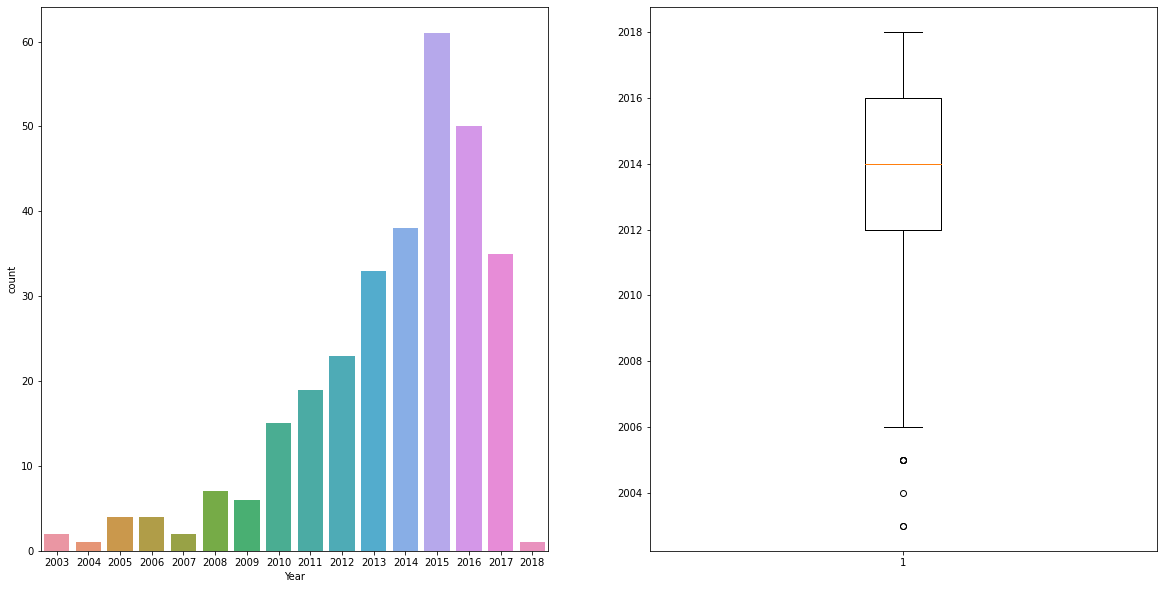

In [14]:
f = plt.figure(figsize=(20,10))

f.add_subplot(1,2,1)
sns.countplot(x=data['Year'])

f.add_subplot(1,2,2)
plt.boxplot(data['Year'])
plt.show

In [15]:
sell_price = data['Selling_Price']
fuel = data['Fuel_Type']
seller = data['Seller_Type']
transm = data['Transmission']
owner = data['Owner']

<function matplotlib.pyplot.show(close=None, block=None)>

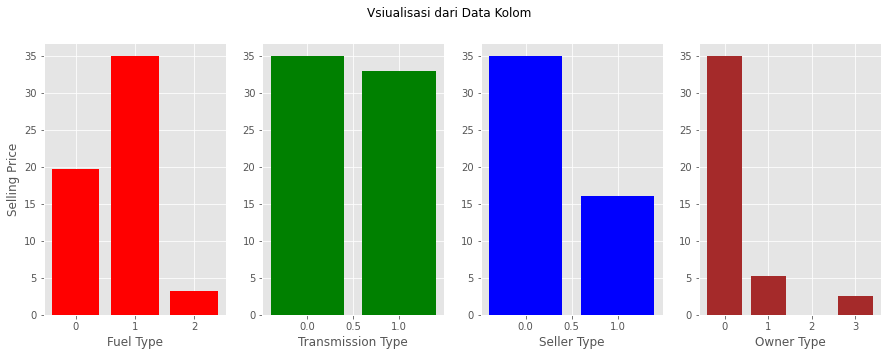

In [16]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle ("Vsiualisasi dari Data Kolom")
plt.subplot(1,4,1)
plt.bar(fuel,sell_price, color='red')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")

plt.subplot(1,4,2)
plt.bar(transm,sell_price, color='green')
plt.xlabel("Transmission Type")

plt.subplot(1,4,3)
plt.bar(seller,sell_price, color='blue')
plt.xlabel("Seller Type")

plt.subplot(1,4,4)
plt.bar(owner,sell_price, color='brown')
plt.xlabel("Owner Type")

plt.show

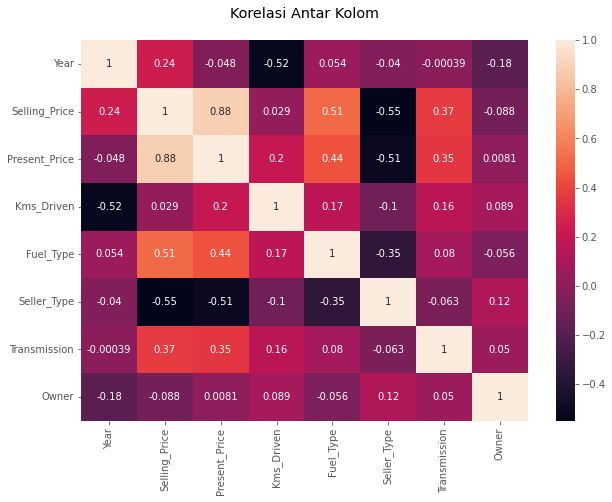

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Korelasi Antar Kolom\n')
plt.show()

<AxesSubplot:title={'center':'Korelasi Selling Price dan Present Price\n'}, xlabel='Present_Price', ylabel='Selling_Price'>

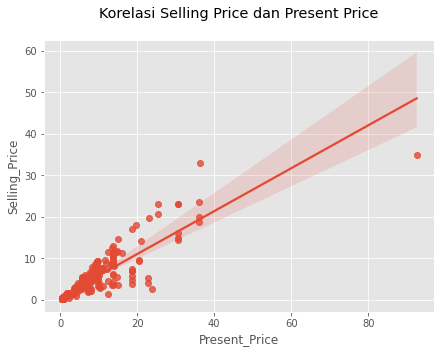

In [18]:
plt.figure(figsize=(7,5))
plt.title("Korelasi Selling Price dan Present Price\n")
sns.regplot(x='Present_Price', y='Selling_Price', data=data)

## Splitting the data

In [19]:
x = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']
print(x.head())
print(y.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [20]:
print("X Shape: ",x.shape)
print("Y Shape: ",y.shape)

X Shape:  (301, 7)
Y Shape:  (301,)


## Splitting Training and Test data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(270, 7)
(31, 7)
(270,)
(31,)


## Regression Model

In [23]:
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
reg_model = LinearRegression()

In [26]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [27]:
test_data_prediction = reg_model.predict(x_test)

In [28]:
reg_model.score(x_test, y_test)

0.8365766715024996

In [29]:
mae = metrics.mean_absolute_error(test_data_prediction, y_test)
print("MAE : ", mae)
mse = metrics.mean_squared_error(test_data_prediction, y_test)
print("MSE : ", mse)
error_score = metrics.r2_score(test_data_prediction, y_test)
print("R squared Error : ", error_score)

MAE :  1.151638215662272
MSE :  2.150129918986333
R squared Error :  0.8062199941174883


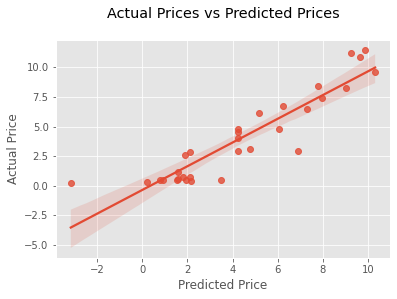

In [30]:
sns.regplot(x=test_data_prediction, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual Prices vs Predicted Prices\n")
plt.show()

In [31]:
print(reg_model.coef_)
print(reg_model.intercept_)

[ 1.20741839  3.90887854 -0.27186953  0.72611628 -0.47837293  0.51240505
 -0.22233144]
4.732148148148194


In [32]:
coef_dict = {'features':x.columns,
            'coef_value':reg_model.coef_
            }
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])

In [33]:
coef

,features,coef_value
0,Year,1.207418
1,Present_Price,3.908879
2,Kms_Driven,-0.271870
3,Fuel_Type,0.726116
4,Seller_Type,-0.478373
5,Transmission,0.512405
6,Owner,-0.222331


In [37]:
reg_model.predict([[2014, 14, 9000,0,1,0,1]])

array([43.67062436])